In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as ddb
from scipy.stats import skew

In [91]:
df = pd.read_excel('Adidas US Sales Datasets Original.xlsx')
df['Operating Margin'] = df['Operating Margin'].mul(100)
df[['Gender', 'Item']] = df['Product'].str.split("'s", expand=True)
df['Cost'] = df['Total Sales'] - df['Operating Profit']
df = pd.DataFrame(df)

query = "from df where Cost > 0"
df = ddb.query(query).to_df()
df.reset_index(drop=True, inplace=True) 



In [92]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cost
count,"9,644",9644,"9,644","9,644","9,644","9,644","9,644","9,644"
mean,"1,173,845",2021-05-10 15:03:48.452923904,45,257,"93,312","34,440",42,"58,873"
min,"1,128,299",2020-01-01 00:00:00,7,6,160,75,10,85
25%,"1,185,732",2021-02-17 00:00:00,35,106,"4,261","1,925",35,"2,229"
50%,"1,185,732",2021-06-04 00:00:00,45,176,"9,581","4,374",41,"4,996"
75%,"1,185,732",2021-09-16 00:00:00,55,350,"150,000","52,062",49,"94,500"
max,"1,197,831",2021-12-31 00:00:00,110,"1,275","825,000","390,000",80,"567,000"
std,"26,365",NaN,15,214,"141,933","54,200",10,"91,484"


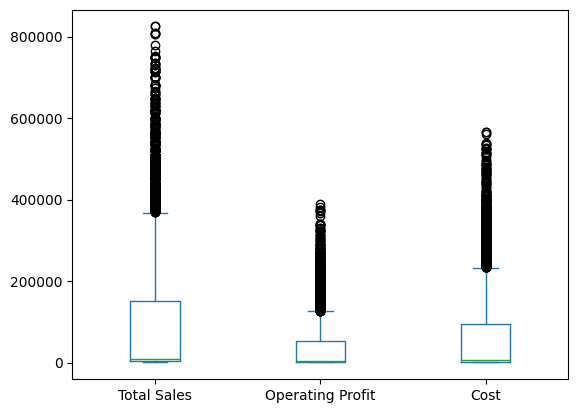

In [93]:
boxplot= df[['Total Sales','Operating Profit', 'Cost']].plot.box()

In [94]:
df.describe(include=['object'])

,Retailer,Region,State,City,Product,Sales Method,Gender,Item
count,9644,9644,9644,9644,9644,9644,9644,9644
unique,6,5,50,52,6,3,2,3
top,Foot Locker,West,Texas,Portland,Men's Street Footwear,Online,Men,Street Footwear
freq,2633,2448,432,360,1610,4887,4826,3218


In [95]:
df['Operating Margin'].value_counts().to_frame()

,count
Operating Margin,
35,1309
40,1290
30,700
50,610
45,364
...,...
12,1
53,1
21,1


Skewness: 0.2277410485694091
The distribution is right-skewed.


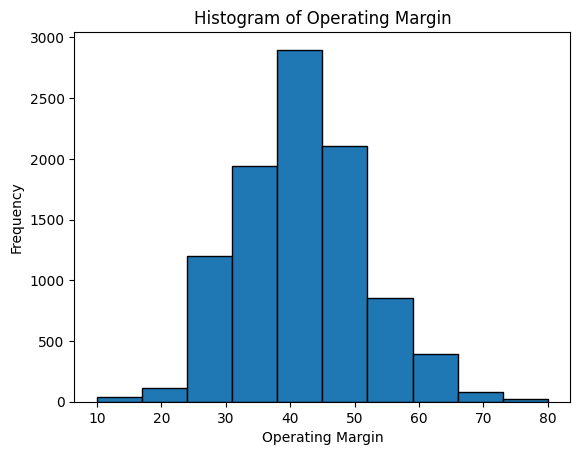

In [96]:
columns = 'Operating Margin'
df[columns].plot.hist(bins=10, edgecolor='black')
plt.title(f'Histogram of {columns}')
plt.xlabel(columns)
plt.ylabel('Frequency')
df[columns].describe()
# Calculate skewness
skewness = skew(df[columns])
print(f"Skewness: {skewness}")

if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")

Skewness: 1.8404860113626287
The distribution is right-skewed.


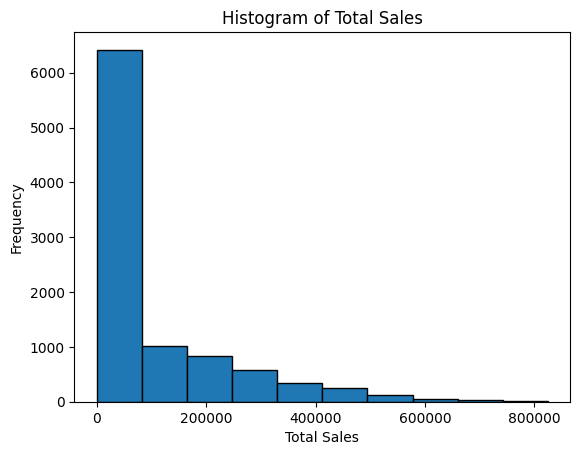

In [97]:
columns = 'Total Sales'
df[columns].plot.hist(bins=10, edgecolor='black')
plt.title(f'Histogram of {columns}')
plt.xlabel(columns)
plt.ylabel('Frequency')
df[columns].describe()
# Calculate skewness
skewness = skew(df[columns])
print(f"Skewness: {skewness}")

if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")


Skewness: 0.3617514891356248
The distribution is right-skewed.


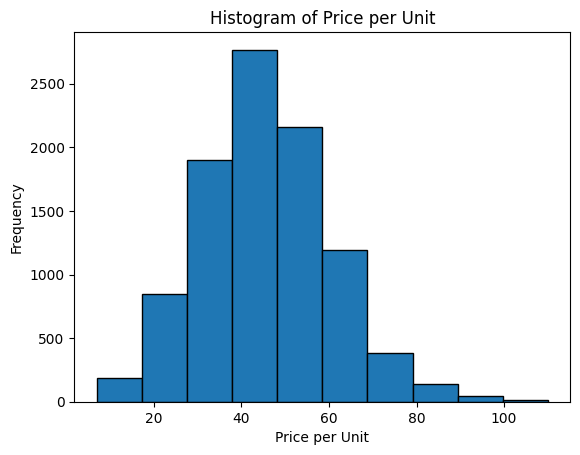

In [98]:
columns = 'Price per Unit'
df[columns].plot.hist(bins=10, edgecolor='black')
plt.title(f'Histogram of {columns}')
plt.xlabel(columns)
plt.ylabel('Frequency')
df[columns].describe()


# Calculate skewness
skewness = skew(df[columns])
print(f"Skewness: {skewness}")

if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")

Skewness of Price per Unit: 0.36
The distribution of Price per Unit is right-skewed.

Skewness of Total Sales: 1.84
The distribution of Total Sales is right-skewed.

Skewness of Operating Margin: 0.23
The distribution of Operating Margin is right-skewed.



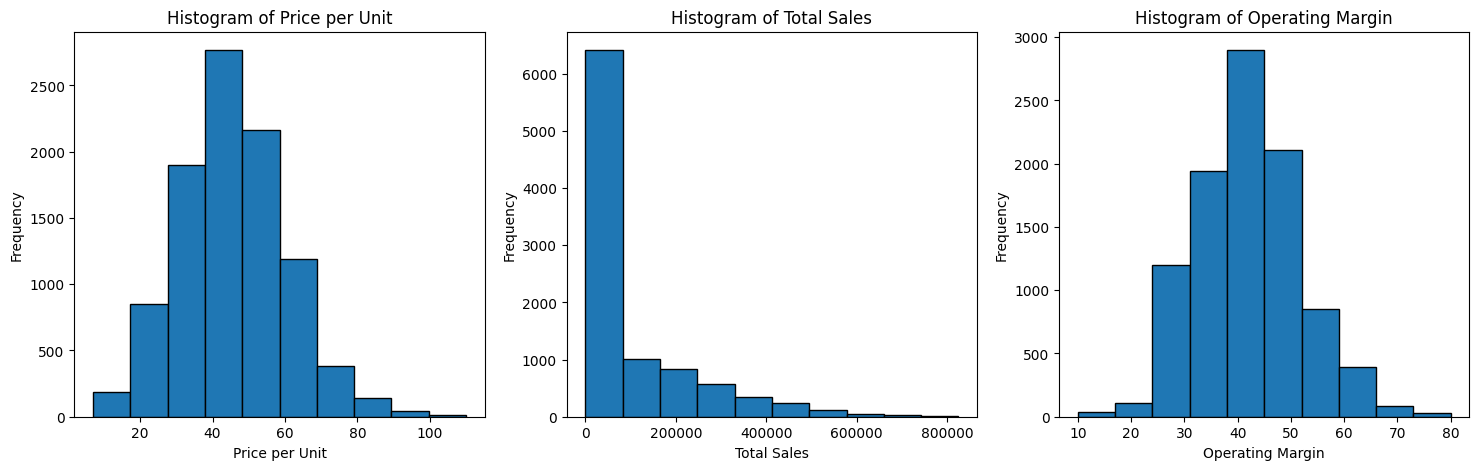

In [99]:
columns = ['Price per Unit', 'Total Sales', 'Operating Margin']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) 

for i, col in enumerate(columns):
    df[col].plot.hist(bins=10, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    skewness = skew(df[col])
    print(f"Skewness of {col}: {skewness:.2f}")
    if skewness > 0:
        print(f"The distribution of {col} is right-skewed.\n")
    elif skewness < 0:
        print(f"The distribution of {col} is left-skewed.\n")
    else:
        print(f"The distribution of {col} is symmetric.\n")

plt.show()

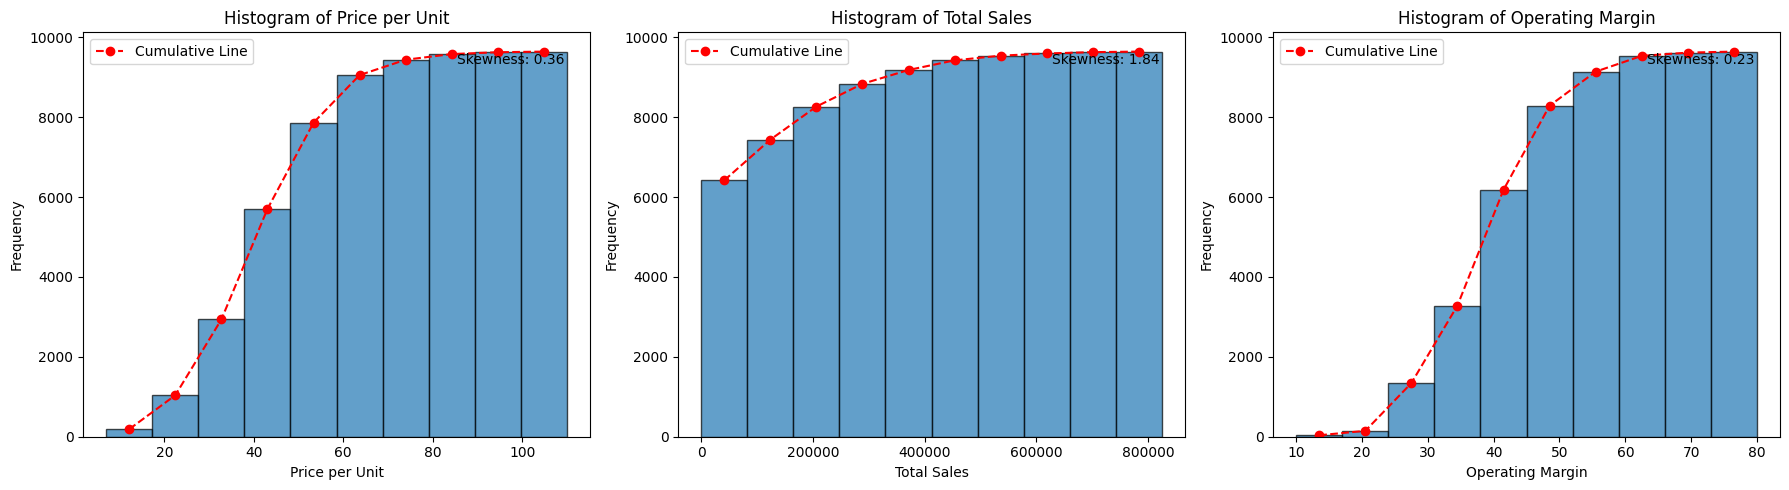

In [217]:

columns = ['Price per Unit', 'Total Sales', 'Operating Margin']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(columns):

    hist_values, bin_edges, _ = axes[i].hist(df[col].dropna(), bins=10, edgecolor='black', cumulative=True, alpha=0.7)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axes[i].plot(bin_centers, hist_values, color='red', linestyle='--', marker='o', label='Cumulative Line')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    skewness = skew(df[col].dropna())  # Ensure to drop NaNs if any
    axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='right', verticalalignment='top', transform=axes[i].transAxes)
    axes[i].legend()

plt.tight_layout()
plt.show()


A right-skewed distribution (also known as positively skewed) means that the tail on the right side of the distribution is longer or fatter than the left side. In such a distribution:

1. Most of the data (e.g., Total Sales values) are concentrated on the lower end (to the left), meaning that a majority of the sales are relatively smaller amounts.
2. A few instances of much larger values (outliers) stretch the tail to the right, causing the skew.
3. The mean (average) of the data is usually greater than the median, as the large outliers pull the mean towards the higher end.

In business terms, a right-skewed distribution for Total Sales might indicate that most sales are small or moderate, but there are occasional very large sales that skew the overall data.

# Scatter Plot

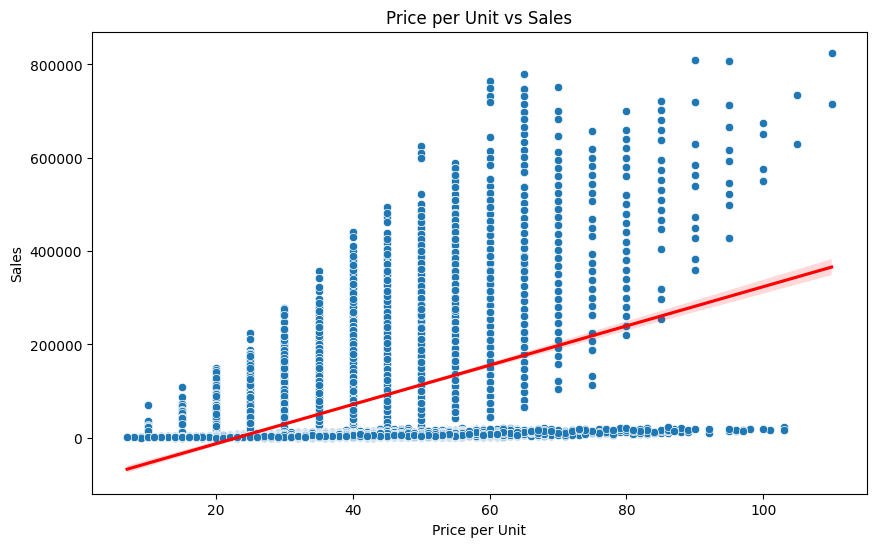

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales')
sns.regplot(data=df, x='Price per Unit', y='Total Sales', scatter=False, color='red')
plt.title('Price per Unit vs Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Sales')
plt.show()

In [101]:
df['Price per Unit'].describe()
query = """
select "Units Sold","Total Sales", "Price per Unit","Operating Profit","Operating Margin" 
from df where "Total Sales" < 200000 and "Price per Unit" =82
"""
n_df = ddb.query(query).to_df()
print(n_df)

    Units Sold  Total Sales  Price per Unit  Operating Profit  \
0          105        8,610              82             3,358   
1          182       14,924              82             5,373   
2          133       10,906              82             4,144   
3          140       11,480              82             5,970   
4          180       14,760              82             6,347   
5          200       16,400              82             5,740   
6          149       12,218              82             5,620   
7          150       12,300              82             5,289   
8          165       13,530              82             6,494   
9          161       13,202              82             7,261   
10         131       10,742              82             6,230   
11         231       18,942              82             7,009   
12         186       15,252              82             5,033   

    Operating Margin  
0                 39  
1                 36  
2                 38

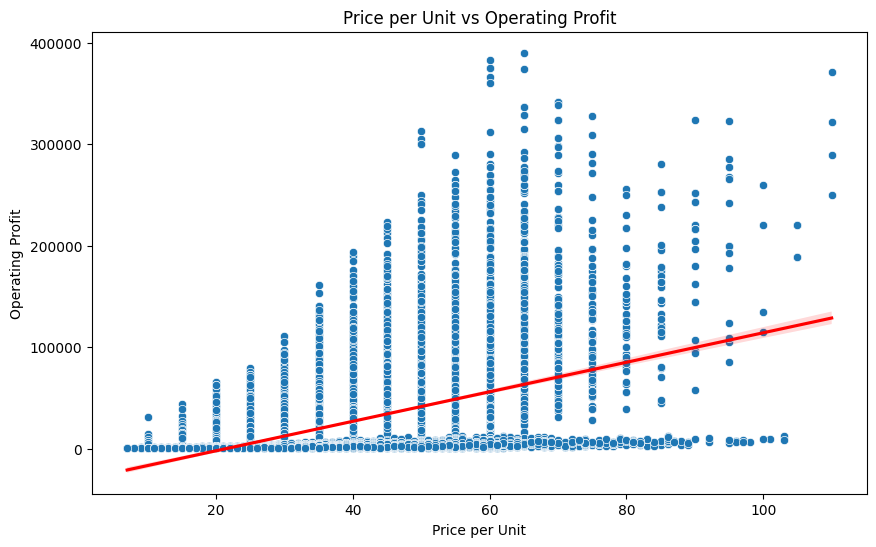

In [102]:
xa='Price per Unit'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()


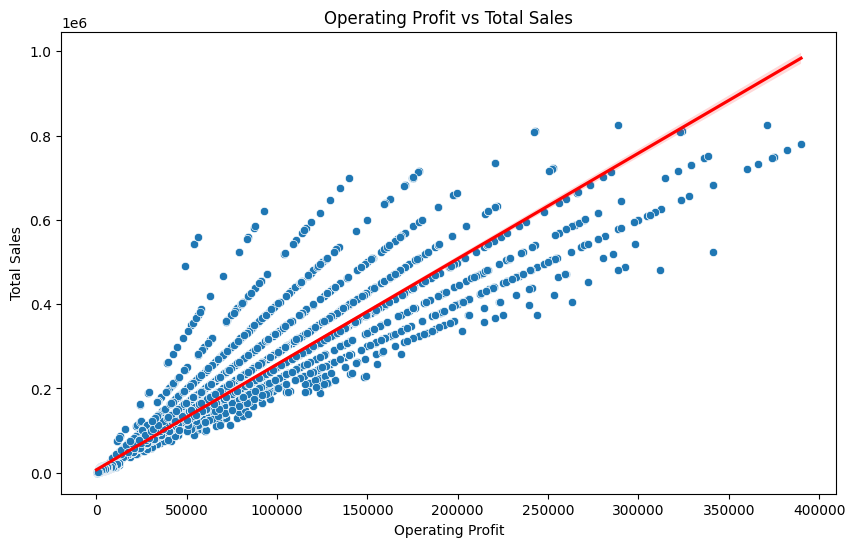

In [103]:
ya='Total Sales'
xa='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

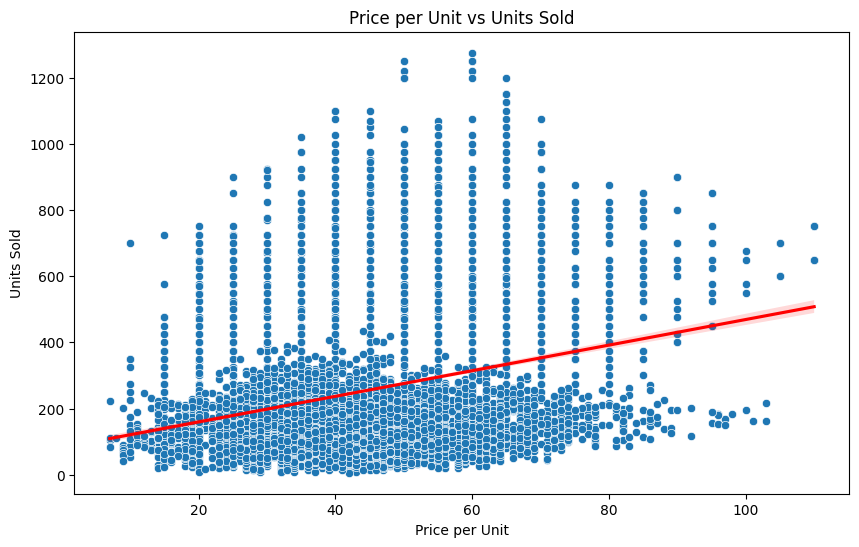

In [104]:
xa='Price per Unit'
ya='Units Sold'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

In [105]:
df['Price per Unit'].describe()

count   9,644
mean       45
std        15
min         7
25%        35
50%        45
75%        55
max       110
Name: Price per Unit, dtype: float64

In [106]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000"
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,"500,000","150,000",30,In-store,Men,Athletic Footwear,"350,000"
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,"400,000","140,000",35,In-store,Women,Street Footwear,"260,000"
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,"382,500","133,875",35,In-store,Women,Athletic Footwear,"248,625"
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,"540,000","162,000",30,In-store,Men,Apparel,"378,000"


In [107]:
low_threshold = 35
mid_threshold = 75

def categorize_price(price):
    if price < low_threshold:
        return '1'
    elif price < mid_threshold:
        return '2'
    else:
        return '3'

df['Price Range'] = df['Price per Unit'].apply(categorize_price)

In [108]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,"500,000","150,000",30,In-store,Men,Athletic Footwear,"350,000",2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,"400,000","140,000",35,In-store,Women,Street Footwear,"260,000",2
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,"382,500","133,875",35,In-store,Women,Athletic Footwear,"248,625",2
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,"540,000","162,000",30,In-store,Men,Apparel,"378,000",2


In [109]:
df['Price Range'].describe()

count     9644
unique       3
top          2
freq      7145
Name: Price Range, dtype: object

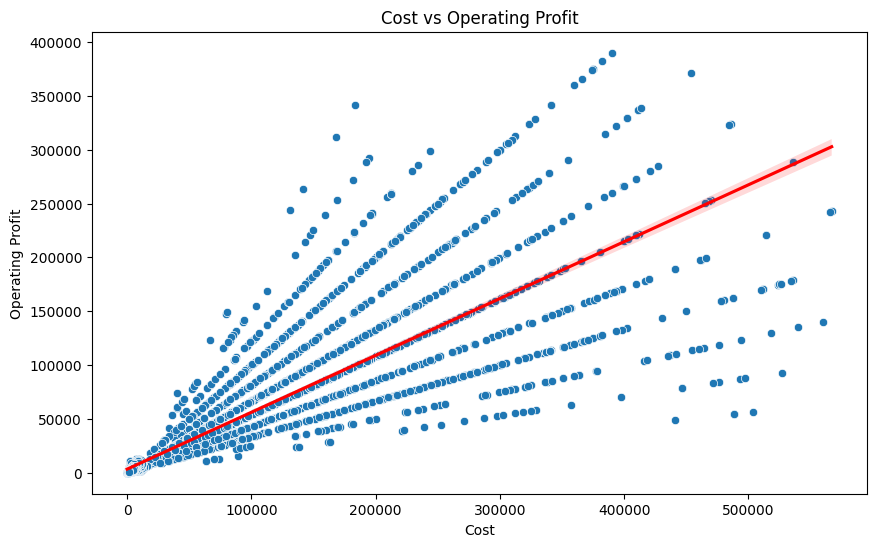

In [110]:
xa='Cost'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

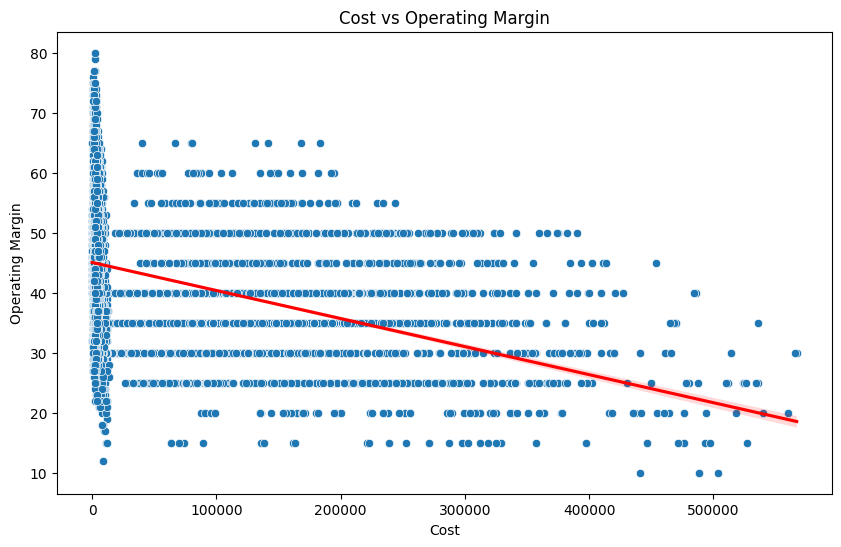

In [111]:
xa='Cost'
ya='Operating Margin'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

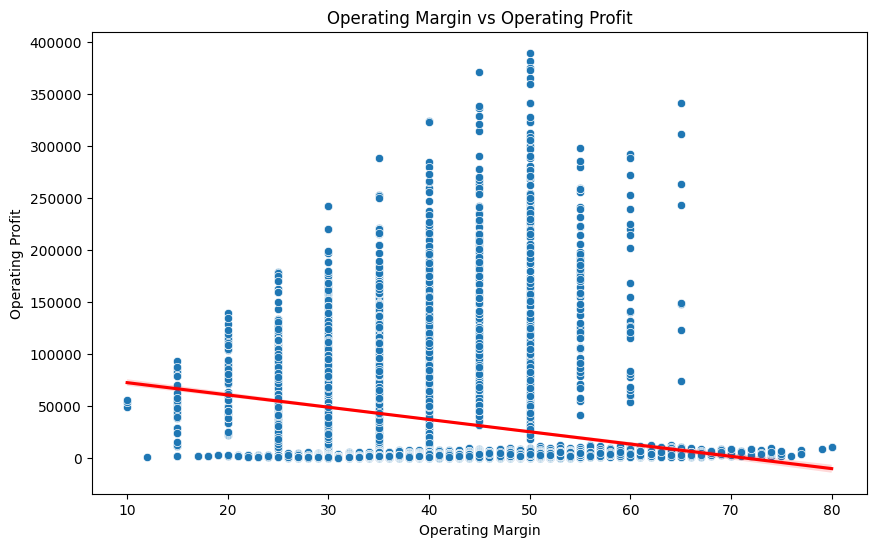

In [112]:
xa='Operating Margin'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

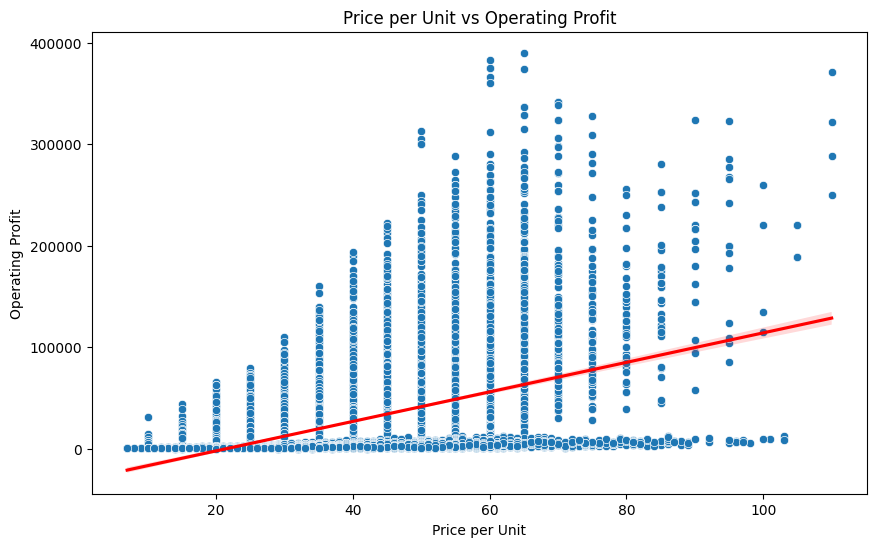

In [113]:
xa='Price per Unit'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

In [114]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cost
count,"9,644",9644,"9,644","9,644","9,644","9,644","9,644","9,644"
mean,"1,173,845",2021-05-10 15:03:48.452923904,45,257,"93,312","34,440",42,"58,873"
min,"1,128,299",2020-01-01 00:00:00,7,6,160,75,10,85
25%,"1,185,732",2021-02-17 00:00:00,35,106,"4,261","1,925",35,"2,229"
50%,"1,185,732",2021-06-04 00:00:00,45,176,"9,581","4,374",41,"4,996"
75%,"1,185,732",2021-09-16 00:00:00,55,350,"150,000","52,062",49,"94,500"
max,"1,197,831",2021-12-31 00:00:00,110,"1,275","825,000","390,000",80,"567,000"
std,"26,365",NaN,15,214,"141,933","54,200",10,"91,484"


In [115]:
df.describe(include=object)

,Retailer,Region,State,City,Product,Sales Method,Gender,Item,Price Range
count,9644,9644,9644,9644,9644,9644,9644,9644,9644
unique,6,5,50,52,6,3,2,3,3
top,Foot Locker,West,Texas,Portland,Men's Street Footwear,Online,Men,Street Footwear,2
freq,2633,2448,432,360,1610,4887,4826,3218,7145


Time Series

In [116]:
df=df.sort_values(by='Invoice Date')

In [117]:

# plt.plot(df['Month'], df['Total Sales'])
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [118]:
"""
Cell generated by Data Wrangler.
"""
from datetime import datetime
import os

def clean_data(df):
    # Derive column 'Month' from column: 'Invoice Date'
    def Month(Invoice_Date):
        """
        Transform based on the following examples:
           Invoice Date    Output
        1: 2020-01-01   => "1"
        2: 2020-02-22   => "2"
        """
        date_format1 = '%-m' if os.name != 'nt' else '%#m'
        return Invoice_Date.strftime(date_format1)
    df.insert(3, "Month", df.apply(lambda row : Month(row["Invoice Date"]), axis=1))
    # Derive column 'Year' from column: 'Invoice Date'
    # Transform based on the following examples:
    #    Invoice Date    Output
    # 1: 2020-01-01   => "2020"
    df.insert(3, "Year", df.apply(lambda row : row["Invoice Date"].strftime("%Y"), axis=1))
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Retailer,Retailer ID,Invoice Date,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [119]:
df_clean['Invoice Date'] = pd.to_datetime(df_clean['Invoice Date'])
df_2020 = df_clean['Year'] == 2020
df_2021 = df_clean['Year'] == 2021
df_2020.head()
# plt.plot(df_2020['Invoice Date'], df_2020['Total Sales'], label='2020')
# plt.plot(df_2021['Invoice Date'], df_2021['Total Sales'], label='2021')


0       False
499     False
8199    False
3886    False
7772    False
Name: Year, dtype: bool

In [120]:
query = """
select Item, sum("Operating Profit") as "Total Profit",sum("Total Sales") as "Total Sales", sum("Cost") as "Cost"
from df_clean group by all
"""
n_df = ddb.query(query).to_df()
print(n_df)

                 Item  Total Profit  Total Sales        Cost
0     Street Footwear   127,898,087  336,829,057 208,930,970
1   Athletic Footwear    90,822,673  260,305,576 169,482,903
2             Apparel   113,414,001  302,767,492 189,353,491


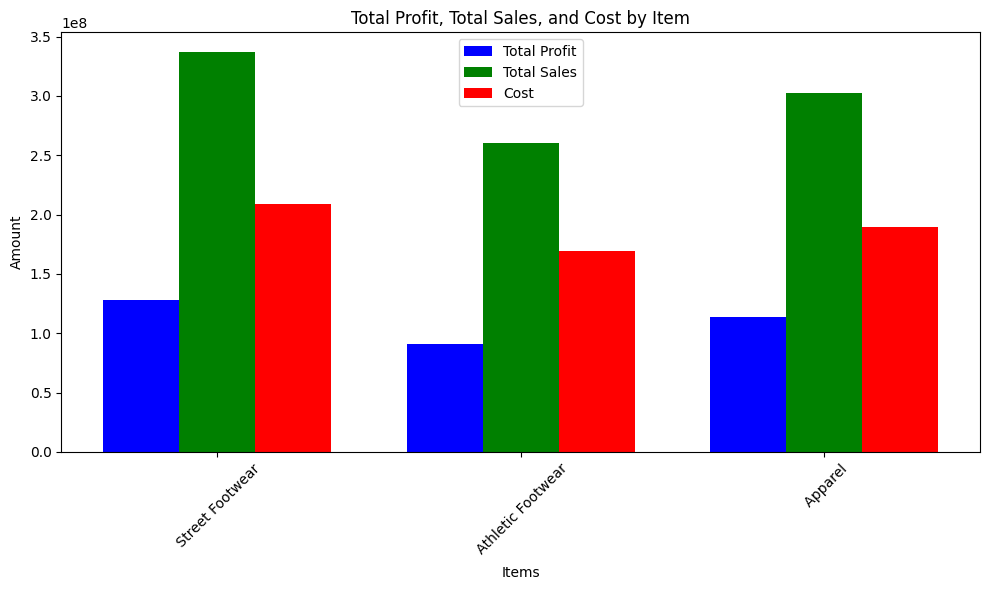

In [121]:

# Sample data from n_df
items = n_df['Item']
total_profit = n_df['Total Profit']
total_sales = n_df['Total Sales']
cost = n_df['Cost']

# Set width of bars and positions
bar_width = 0.25
index = np.arange(len(items))  # the label locations

# Create a figure
plt.figure(figsize=(10, 6))

# Create bars for each value
plt.bar(index, total_profit, bar_width, label='Total Profit', color='blue')
plt.bar(index + bar_width, total_sales, bar_width, label='Total Sales', color='green')
plt.bar(index + 2 * bar_width, cost, bar_width, label='Cost', color='red')

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Amount')
plt.title('Total Profit, Total Sales, and Cost by Item')

# Add xticks on the middle of the group bars
plt.xticks(index + bar_width, items)

# Add legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [122]:
query = """
select Region, sum("Operating Profit") as "Total Profit",sum("Total Sales") as "Total Sales", sum("Cost") as "Cost"
from df_clean 
group by all
order by "Total Profit" asc
"""
n_df = ddb.query(query).to_df()
print(n_df)

      Region  Total Profit  Total Sales        Cost
0    Midwest    52,811,346  135,800,459  82,989,113
1  Southeast    60,555,417  163,171,236 102,615,819
2      South    61,138,004  144,663,181  83,525,177
3  Northeast    68,020,588  186,324,067 118,303,479
4       West    89,609,407  269,943,182 180,333,775


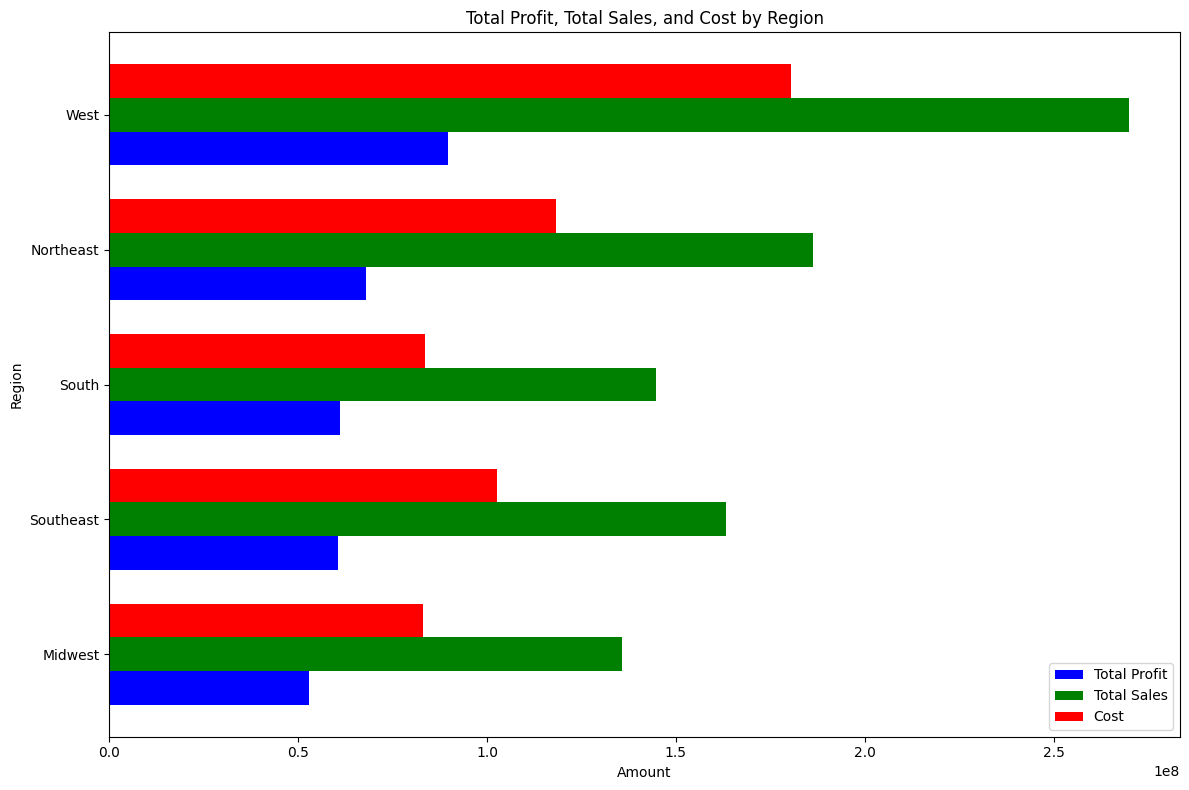

In [123]:

# Sample data from n_df
Region = n_df['Region']
total_profit = n_df['Total Profit']
total_sales = n_df['Total Sales']
cost = n_df['Cost']


# Set width of bars and positions
bar_width = 0.25
index = np.arange(len(Region))  # the y-axis locations

# Create a figure
plt.figure(figsize=(12, 8))

# Create horizontal bars for each value
plt.barh(index - bar_width, total_profit, bar_width, label='Total Profit', color='blue')
plt.barh(index, total_sales, bar_width, label='Total Sales', color='green')
plt.barh(index + bar_width, cost, bar_width, label='Cost', color='red')

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Region')
plt.title('Total Profit, Total Sales, and Cost by Region')

# Add yticks on the middle of the group bars
plt.yticks(index, Region)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Time Stamp

In [124]:
df_clean.head()

,Retailer,Retailer ID,Invoice Date,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [125]:
"""
Cell generated by Data Wrangler.
"""
from datetime import datetime

def clean_data(df_clean):
    # Derive column 'DayOfWeek' from column: 'Invoice Date'
    # Transform based on the following examples:
    #    Invoice Date    Output
    # 1: 2020-01-01   => "Wed"
    df_clean.insert(3, "DayOfWeek", df_clean.apply(lambda row : row["Invoice Date"].strftime("%a"), axis=1))
    return df_clean

df_clean_1 = clean_data(df_clean.copy())
df_clean_1.head()

,Retailer,Retailer ID,Invoice Date,DayOfWeek,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [126]:
# df_clean_1.pivot_table(
#     index= 'DayOfWeek',
#     columns='Month',
#     values='Total Sales',
#     aggfunc="sum"
# )
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, 0 to 1198
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9644 non-null   object        
 1   Retailer ID       9644 non-null   int64         
 2   Invoice Date      9644 non-null   datetime64[ns]
 3   DayOfWeek         9644 non-null   object        
 4   Year              9644 non-null   object        
 5   Month             9644 non-null   object        
 6   Region            9644 non-null   object        
 7   State             9644 non-null   object        
 8   City              9644 non-null   object        
 9   Product           9644 non-null   object        
 10  Price per Unit    9644 non-null   float64       
 11  Units Sold        9644 non-null   int64         
 12  Total Sales       9644 non-null   float64       
 13  Operating Profit  9644 non-null   float64       
 14  Operating Margin  9644 non-nu

In [127]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean_1):
    # Change column type to int64 for column: 'Month'
    df_clean_1 = df_clean_1.astype({'Month': 'int64'})
    return df_clean_1

df_clean_2 = clean_data(df_clean_1.copy())
df_clean_2.head()

,Retailer,Retailer ID,Invoice Date,DayOfWeek,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [128]:
df_clean_2.head()

,Retailer,Retailer ID,Invoice Date,DayOfWeek,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [129]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean_2):
    # Drop column: 'DayOfWeek'
    df_clean_2 = df_clean_2.drop(columns=['DayOfWeek'])
    # Change column type to int64 for column: 'Month'
    df_clean_2 = df_clean_2.astype({'Month': 'int64'})
    df_clean_2['DayOfWeek'] = df_clean_2['Invoice Date'].dt.dayofweek
    # Change column type to int64 for column: 'DayOfWeek'
    df_clean_2 = df_clean_2.astype({'DayOfWeek': 'int64'})
    return df_clean_2


df_clean_2.head()

,Retailer,Retailer ID,Invoice Date,DayOfWeek,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,Wed,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [130]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean_2):
    categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    df_clean_2["DayOfWeek"] = pd.Categorical(df_clean_2['DayOfWeek'], categories=categories, ordered=True).codes
    return df_clean_2

df_clean_3 = clean_data(df_clean_2.copy())
df_clean_3.head()

,Retailer,Retailer ID,Invoice Date,DayOfWeek,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,2,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,2,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,2,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,2,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,2,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [131]:
df_clean_3.pivot_table(
    index= 'DayOfWeek',
    columns='Month',
    values='Total Sales',
    aggfunc='sum'
    
)

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
0,"6,272,429","9,749,177","8,204,497","7,959,865","11,927,809","8,392,522","14,316,543","11,747,898","12,248,669","9,437,239","3,134,687","8,944,052"
1,"11,220,808","5,542,593","14,925,920","9,833,298","13,662,731","9,813,118","12,711,669","28,564,749","7,876,958","11,215,965","8,039,792","3,730,486"
2,"11,053,272","12,774,679","9,257,368","8,588,587","12,531,801","4,180,823","4,523,124","12,074,427","9,829,359","4,963,180","20,340,141","9,997,704"
3,"9,405,369","10,392,239","5,052,528","6,253,231","12,700,160","24,576,363","11,250,415","6,937,017","10,769,021","7,699,562","10,214,562","30,432,653"
4,"7,119,800","9,550,645","7,271,684","15,488,122","6,561,822","12,166,901","34,190,041","13,863,264","12,241,842","9,277,594","6,708,507","12,242,877"
5,"10,554,402","5,592,551","7,664,032","14,643,642","9,042,775","11,186,803","12,408,732","10,961,203","12,434,553","6,187,798","10,254,638","6,998,850"
6,"15,853,062","7,498,269","4,433,080","9,573,225","14,080,597","4,430,842","6,080,170","8,017,643","12,261,057","15,129,695","9,165,013","13,495,335"


<Axes: xlabel='Month', ylabel='DayOfWeek'>

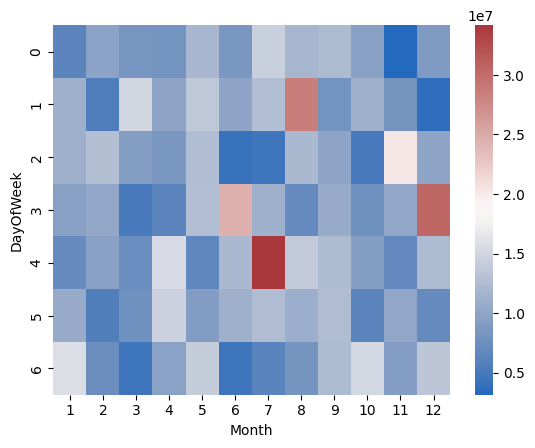

In [132]:



sns.heatmap(
df_clean_3.pivot_table(
    index= 'DayOfWeek',
    columns='Month',
    values='Total Sales',
    aggfunc='sum'
    
).round(),
cmap="vlag",
fmt="g"
)

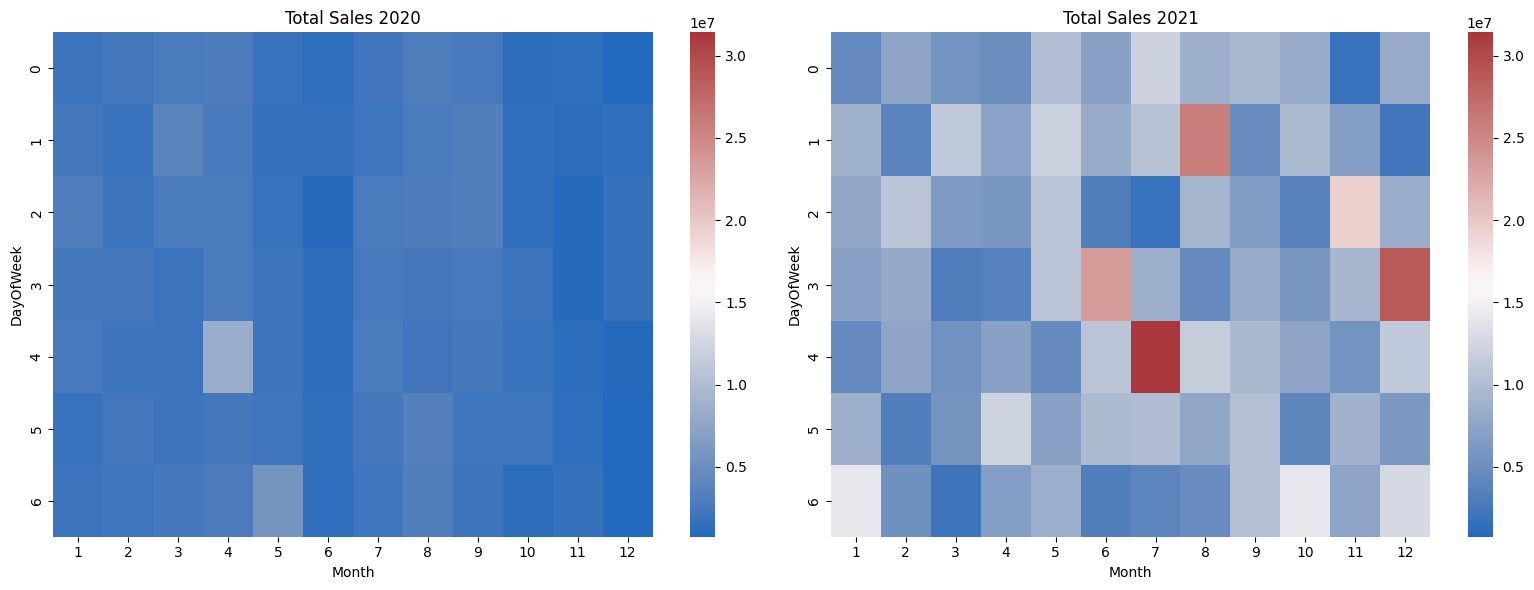

In [151]:

query_2020 = "from df_clean_3 where Year = 2020"
query_2021 = "from df_clean_3 where Year = 2021"
df2020 = ddb.query(query_2020).to_df()
df2021 = ddb.query(query_2021).to_df()

# Create pivot tables
pivot_2020 = df2020.pivot_table(
    index='DayOfWeek',
    columns='Month',
    values='Total Sales',
    aggfunc='sum'
).round()

pivot_2021 = df2021.pivot_table(
    index='DayOfWeek',
    columns='Month',
    values='Total Sales',
    aggfunc='sum'
).round()

# Determine common color scale limits
vmin = min(pivot_2020.min().min(), pivot_2021.min().min())
vmax = max(pivot_2020.max().max(), pivot_2021.max().max())

# Set up the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Create heatmaps with consistent color scale
sns.heatmap(
    pivot_2020,
    cmap="vlag",
    ax=axs[0],
    vmin=vmin,
    vmax=vmax
)

sns.heatmap(
    pivot_2021,
    cmap="vlag",
    ax=axs[1],
    vmin=vmin,
    vmax=vmax
)

# Set titles
axs[0].set_title("Total Sales 2020")
axs[1].set_title("Total Sales 2021")

# Adjust layout
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Total Sales vs Month in 2021')

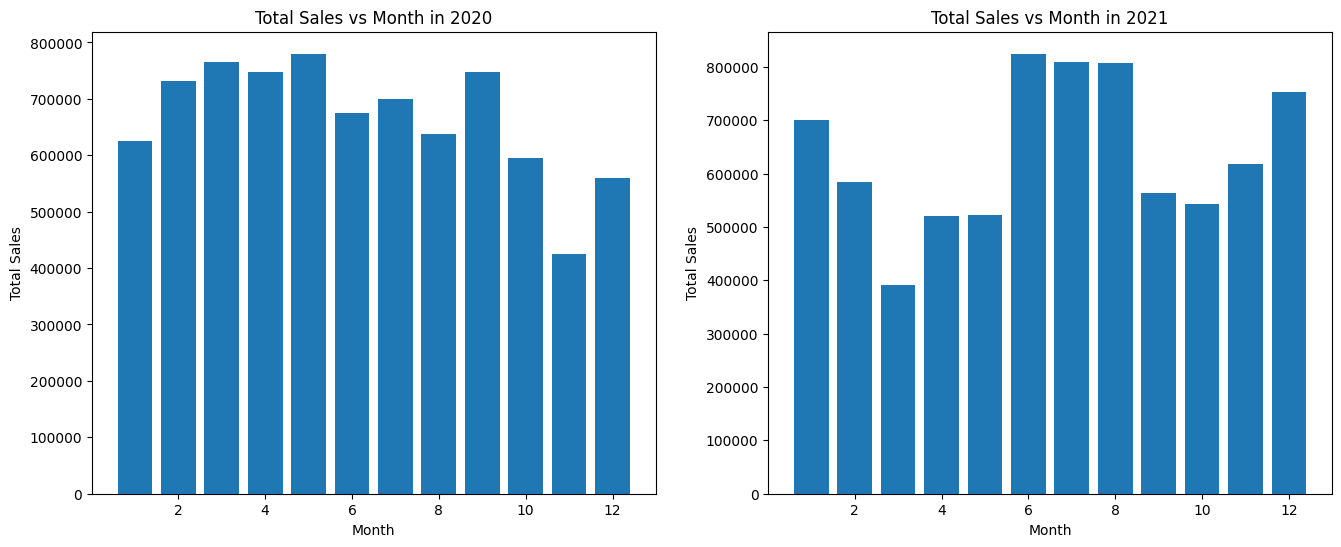

In [149]:
fig,axs = plt.subplots(1,2,figsize=(16,6))


axs[0].bar(df2020['Month'], df2020['Total Sales'], label='2020 Total Sales')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Sales')
axs[0].set_title('Total Sales vs Month in 2020')


axs[1].bar(df2021['Month'], df2021['Total Sales'], label='2021 Total Sales')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Sales')
axs[1].set_title('Total Sales vs Month in 2021')



<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, 0 to 1198
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9644 non-null   object        
 1   Retailer ID       9644 non-null   int64         
 2   Invoice Date      9644 non-null   datetime64[ns]
 3   DayOfWeek         9644 non-null   int8          
 4   Year              9644 non-null   object        
 5   Month             9644 non-null   int64         
 6   Region            9644 non-null   object        
 7   State             9644 non-null   object        
 8   City              9644 non-null   object        
 9   Product           9644 non-null   object        
 10  Price per Unit    9644 non-null   float64       
 11  Units Sold        9644 non-null   int64         
 12  Total Sales       9644 non-null   float64       
 13  Operating Profit  9644 non-null   float64       
 14  Operating Margin  9644 non-nu

<BarContainer object of 2 artists>

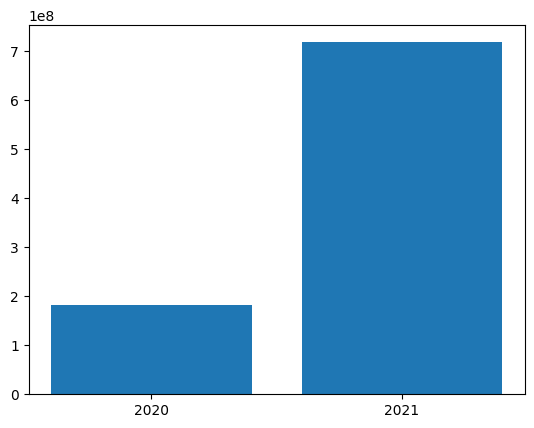

In [180]:
query = """
select Year, sum("Total Sales") as "Total Sales"
from df_clean 
group by all
"""
sales = ddb.query(query).to_df()
plt.bar(sales['Year'],sales['Total Sales'])
df_clean

Text(0.5, 1.0, 'Heatmap sales 2020')

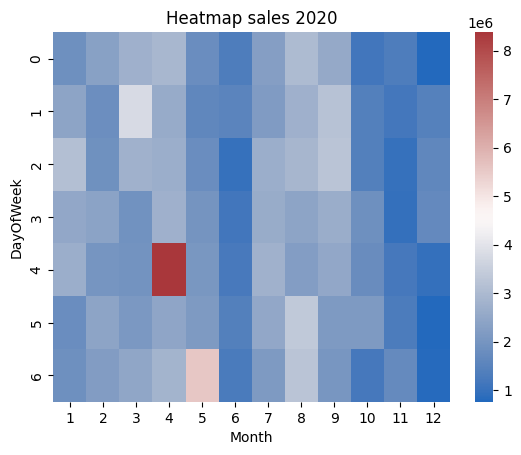

In [184]:
sns.heatmap(
    df2020.pivot_table(
        index='DayOfWeek',
        columns='Month',
        values='Total Sales',
        aggfunc='sum'
    ).round(),  # Optional: .round(2) for two decimal places
    cmap="vlag",
    fmt="g"
)
plt.title('Heatmap sales 2020')

Text(0.5, 1.0, 'Heatmap sales 2021')

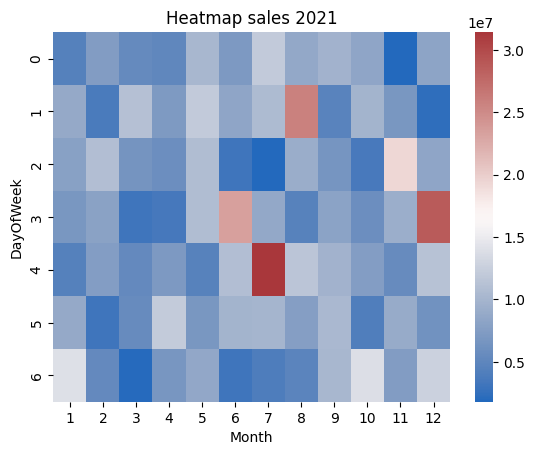

In [185]:
sns.heatmap(
    df2021.pivot_table(
        index='DayOfWeek',
        columns='Month',
        values='Total Sales',
        aggfunc='sum'
    ).round(),  # Optional: .round(2) for two decimal places
    cmap="vlag",
    fmt="g"
)
plt.title('Heatmap sales 2021')

In [187]:

query = "from df2021 where Month =7"
july = ddb.query(query).to_df()
july.describe()

,Retailer ID,Invoice Date,DayOfWeek,Month,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cost
count,670,670,670,670,670,670,670,670,670,670
mean,"1,175,094",2021-07-13 17:50:19.701492480,3,7,52,269,"116,917","43,488",43,"73,429"
min,"1,128,299",2021-07-01 00:00:00,0,7,16,7,203,108,15,95
25%,"1,185,732",2021-07-08 00:00:00,1,7,41,119,"5,610","2,501",35,"2,842"
50%,"1,185,732",2021-07-13 00:00:00,4,7,50,190,"13,452","6,068",42,"6,931"
75%,"1,185,732",2021-07-19 00:00:00,4,7,59,375,"179,688","67,031",49,"115,062"
max,"1,197,831",2021-07-31 00:00:00,6,7,110,"1,150","810,000","341,250",69,"567,000"
std,"24,115",NaN,2,0,16,216,"174,213","66,058",9,"111,174"


In [198]:

query = """
select Gender, sum("Operating Profit") as "Total Profit",sum("Total Sales") as "Total Sales", sum("Cost") as "Cost",
avg("Operating Margin") as "Operating Margin"
from df_clean 
group by all
order by "Total Profit" asc
"""
n_df = ddb.query(query).to_df()
print(n_df)

  Gender  Total Profit  Total Sales        Cost  Operating Margin
0  Women   152,722,582  413,673,569 260,950,987                43
1    Men   179,412,179  486,228,556 306,816,377                42


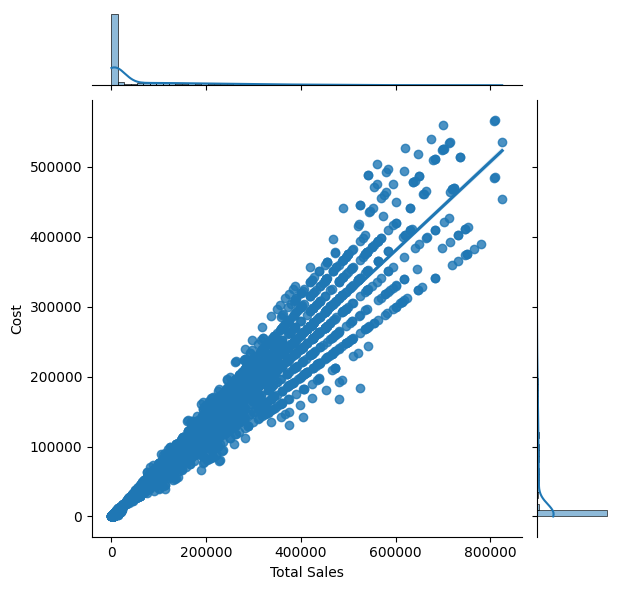

In [214]:
sns.jointplot(x="Total Sales",y="Cost",data=df_clean, kind="reg")
